In [1]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

    
df.dropna(inplace=True)
df = df.reset_index()[df.columns]
#print (df.isnull().sum())
def tenure_lab(t) :
    
    if t <= 12 :
        return 1
    elif (t > 12) & (t <= 24 ):
        return 2
    elif (t > 24) & (t <= 48) :
        return 3
    elif (t > 48) & (t <= 60) :
        return 4
    elif t > 60 :
        return 5

df["tenure"]=df["tenure"].map(tenure_lab)


#since we have 72 categories in tenure we will reduce the number of categories in it
#therefoe we made above function and to check how many categories each column has now,we are using the following loop

for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()
    print ("Feature", c_n,"has", unique_cat,"unique categories")


X=df.drop('Churn',1)
Y=df.Churn

X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()

num_cols   = [x for x in X.columns if x not in todummy_list]
'''todummy_list.remove('tenure')
num_cols.insert(3,'tenure')'''
X_org=X.copy()

for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    #dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)
X=X.drop(['StreamingTV_No internet service','StreamingMovies_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service'],axis=1)
    
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
Y= le.fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


from sklearn.preprocessing import StandardScaler
# Fitting parameters for scaling x_train for the numerical columns 
std = StandardScaler().fit(x_train[num_cols])
#Transforming the the original data
x_train_transformed=std.transform(x_train[num_cols])
x_train_transformed_df = pd.DataFrame(x_train_transformed,columns=num_cols)
x_train=x_train.drop(num_cols,1)
x_train=pd.concat([x_train.reset_index(drop=True),x_train_transformed_df.reset_index(drop=True) ],axis=1)

#Transforming the the test data's numerical with x_train scaled parameters
x_test_transformed=std.transform(x_test[num_cols])
x_test_transformed_df = pd.DataFrame(x_test_transformed,columns=num_cols)
x_test=x_test.drop(num_cols,1)
x_test=pd.concat([x_test.reset_index(drop=True),x_test_transformed_df .reset_index(drop=True) ],axis=1)

std = StandardScaler().fit(X[num_cols])
x_transformed=std.transform(X[num_cols])
x_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)
x_kf=X.drop(num_cols,1)
x_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)


Feature customerID has 7032 unique categories
Feature gender has 2 unique categories
Feature SeniorCitizen has 2 unique categories
Feature Partner has 2 unique categories
Feature Dependents has 2 unique categories
Feature tenure has 5 unique categories
Feature PhoneService has 2 unique categories
Feature MultipleLines has 3 unique categories
Feature InternetService has 3 unique categories
Feature OnlineSecurity has 3 unique categories
Feature OnlineBackup has 3 unique categories
Feature DeviceProtection has 3 unique categories
Feature TechSupport has 3 unique categories
Feature StreamingTV has 3 unique categories
Feature StreamingMovies has 3 unique categories
Feature Contract has 3 unique categories
Feature PaperlessBilling has 2 unique categories
Feature PaymentMethod has 4 unique categories
Feature MonthlyCharges has 1584 unique categories
Feature TotalCharges has 6530 unique categories
Feature Churn has 2 unique categories


In [2]:
print(num_cols)
print(todummy_list)
x_train.head(5)


['MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,StreamingMovies_No,...,Dependents_No,Dependents_Yes,Partner_No,Partner_Yes,SeniorCitizen_0,SeniorCitizen_1,gender_Female,gender_Male,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,0,1,-0.210557,-0.409637
1,0,1,0,0,1,0,0,0,1,0,...,0,1,0,1,1,0,1,0,1.630408,2.602889
2,0,0,0,1,1,0,0,0,1,0,...,0,1,0,1,1,0,0,1,-1.309143,-0.246971
3,0,1,0,0,1,0,0,1,0,0,...,0,1,1,0,1,0,1,0,-1.505557,-0.597636
4,1,0,0,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,0.648338,-0.199795


In [3]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    # all parameters not specified are set to their defaults
    
   
        
        
        
    
 
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    
    print("tpr=",tpr," and 1-fpr=", 1-fpr)

    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    '''probs = m.predict_proba(x_test)
    probs = probs[:, 1]


    fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

    #plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr1, tpr1, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)'''


    import matplotlib.pyplot as plt
    import seaborn as sns

    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);


		-------------------LOGISTIC REGRESSION_WO_Feature_selection----------------



             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1038
          1       0.67      0.50      0.57       369

avg / total       0.79      0.80      0.79      1407

[[946  92]
 [184 185]]
tpr= [0.         0.50135501 1.        ]  and 1-fpr= [1.         0.91136802 0.        ]


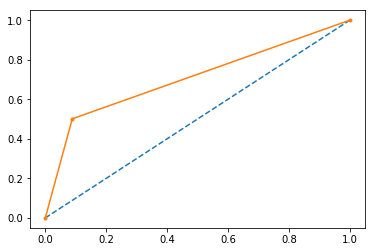

AUC: 0.706


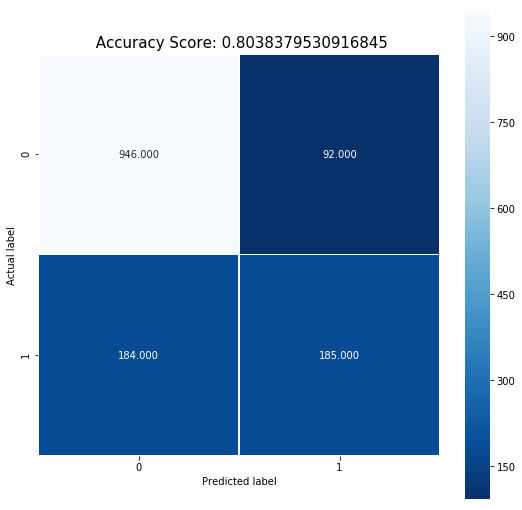

In [4]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_WO_Feature_selection}---------------------------------"""

print ('\t\t-------------------LOGISTIC REGRESSION_WO_Feature_selection----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train, y_train)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

roc_plot(m,x_test,y_test,predictions)

		-------------------LOGISTIC REGRESSION_WO_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7044601206053022
 ROC_AUC FOR FOLD  2 is 0.7168050972806916
 ROC_AUC FOR FOLD  3 is 0.6927409261576971
 ROC_AUC FOR FOLD  4 is 0.7381130041868755
 ROC_AUC FOR FOLD  5 is 0.6800252870704308
 ROC_AUC FOR FOLD  6 is 0.6943995357128052
 ROC_AUC FOR FOLD  7 is 0.7176916221033867
 ROC_AUC FOR FOLD  8 is 0.7176916221033867
 ROC_AUC FOR FOLD  9 is 0.7048252704887452
 ROC_AUC FOR FOLD  10 is 0.709739934983746


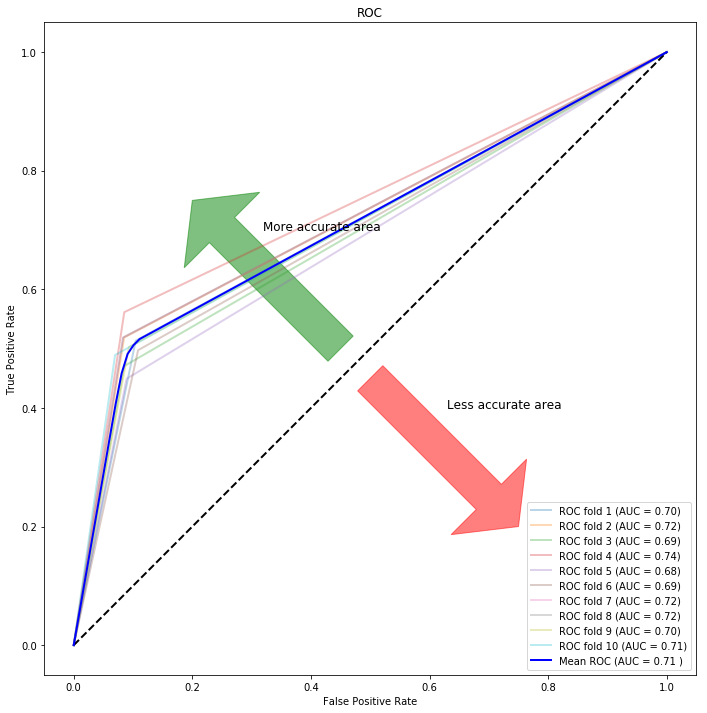

In [5]:
print ('\t\t-------------------LOGISTIC REGRESSION_WO_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<-----------------------K-fold logistic regression(VALIDATION and TESTING)------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7127659574468085
 ROC_AUC FOR FOLD  2 is 0.7022691334598354
 ROC_AUC FOR FOLD  3 is 0.7085216960897542
 ROC_AUC FOR FOLD  4 is 0.689380628157259
 ROC_AUC FOR FOLD  5 is 0.7267569045665847
 ROC_AUC FOR FOLD  6 is 0.7069092697319891
 ROC_AUC FOR FOLD  7 is 0.6774505672862338
 ROC_AUC FOR FOLD  8 is 0.7085815842924847
 ROC_AUC FOR FOLD  9 is 0.7254045307443365
 ROC_AUC FOR FOLD  10 is 0.7061544777062019


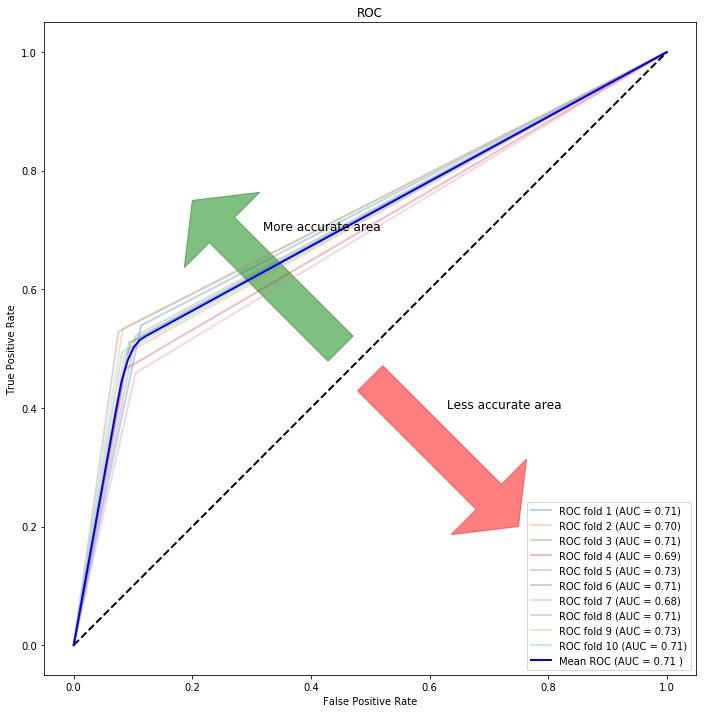

tpr= [0.         0.29041096 1.        ]  and 1-fpr= [1.         0.95585413 0.        ]


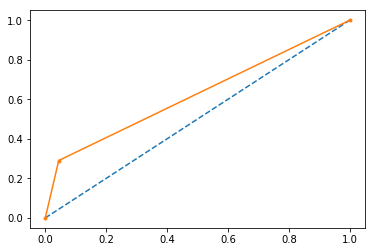

AUC: 0.623


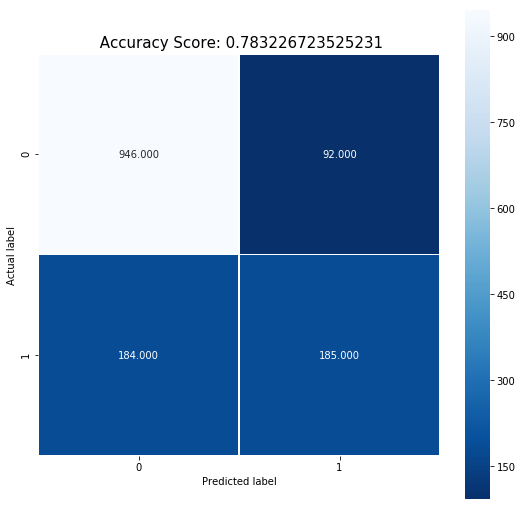

In [6]:
print("<-----------------------K-fold logistic regression(VALIDATION and TESTING)------------------------------------->")

from sklearn.model_selection import train_test_split

x_train_eighty, x_test_twenty, y_train_eighty, y_test_twenty = train_test_split(x_kf, Y, test_size=0.20, random_state=20)

# plot arrows
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt


# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_train_eighty, y_train_eighty)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_train_eighty,y_train_eighty ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
pred_test=m.predict(x_test_twenty)
roc_plot(m,x_test_twenty,y_test_twenty,pred_test)



		-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_HoldOut----------------



             precision    recall  f1-score   support

          0       0.91      0.71      0.80      1038
          1       0.49      0.79      0.61       369

avg / total       0.80      0.73      0.75      1407

[[738 300]
 [ 77 292]]
tpr= [0.         0.79132791 1.        ]  and 1-fpr= [1.         0.71098266 0.        ]


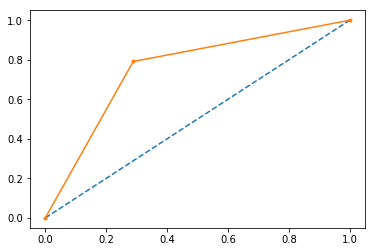

AUC: 0.751


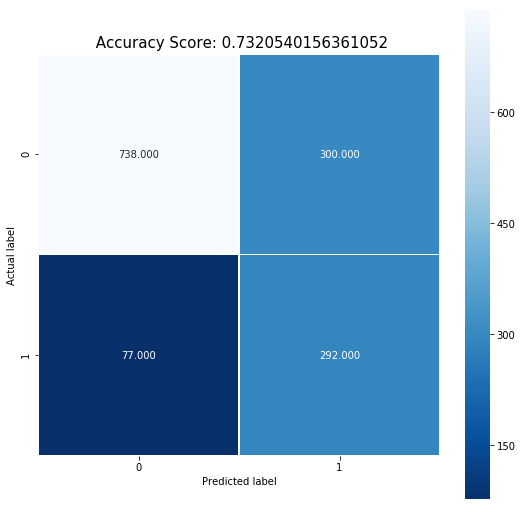

In [7]:
print ('\t\t-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_HoldOut----------------\n\n\n')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb_ho=GaussianNB()
m=gnb_ho.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
roc_plot(m,x_test,y_test,predictions)

		-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7701103652292639
 ROC_AUC FOR FOLD  2 is 0.7610649675731027
 ROC_AUC FOR FOLD  3 is 0.7531004664922062
 ROC_AUC FOR FOLD  4 is 0.7610320026530697
 ROC_AUC FOR FOLD  5 is 0.7809870248310741
 ROC_AUC FOR FOLD  6 is 0.7096028686315965
 ROC_AUC FOR FOLD  7 is 0.7639752518343489
 ROC_AUC FOR FOLD  8 is 0.7382062761679724
 ROC_AUC FOR FOLD  9 is 0.7471966587903659
 ROC_AUC FOR FOLD  10 is 0.7492810702675669


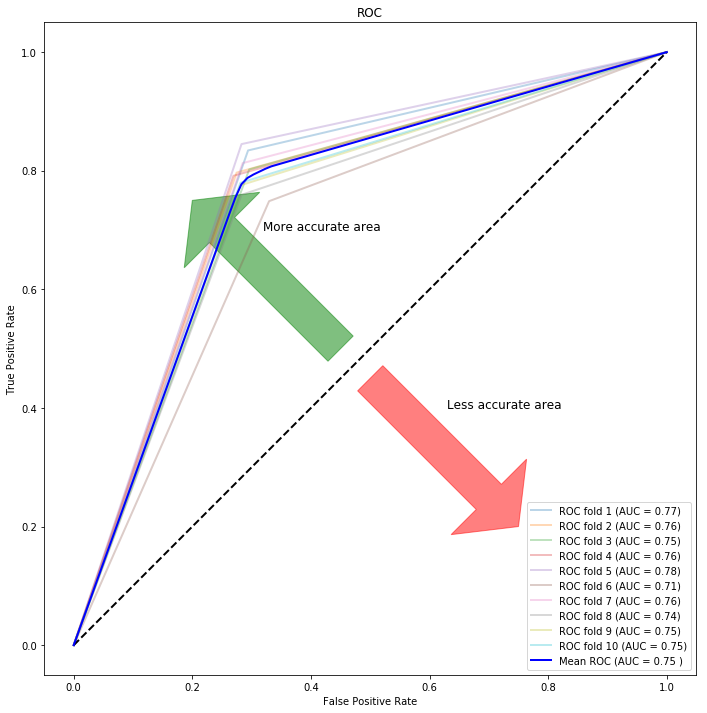

In [8]:
print ('\t\t-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pylab as plt
gnb=GaussianNB()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    gnb_kf=gnb.fit(X.iloc[train_index],Y[train_index])
    pred=gnb_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		-------------------SVM_WO_Feature_selection_(HO)----------------



             precision    recall  f1-score   support

          0       0.82      0.93      0.87      1038
          1       0.67      0.42      0.52       369

avg / total       0.78      0.79      0.78      1407

[[963  75]
 [214 155]]
tpr= [0.        0.4200542 1.       ]  and 1-fpr= [1.         0.92774566 0.        ]


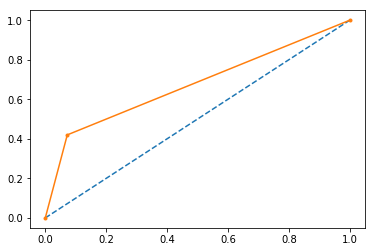

AUC: 0.674


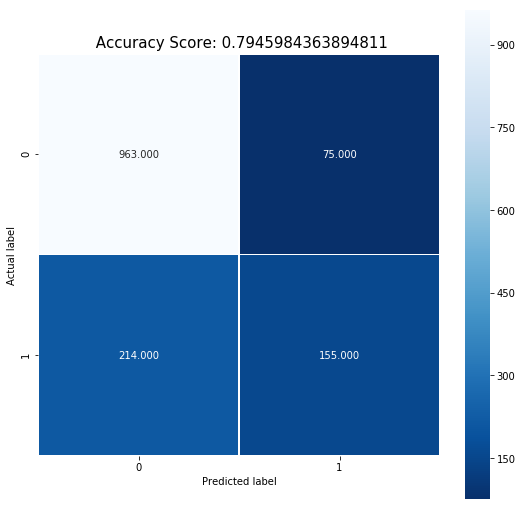

In [9]:
print ('\t\t-------------------SVM_WO_Feature_selection_(HO)----------------\n\n\n')

from sklearn.svm import SVC
SVM=SVC(random_state=0)
'''SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)'''
                         


m=SVM.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
roc_plot(m,x_test,y_test,predictions)

		-------------------SVM_WO_Feature_selection_(HO){After Tuning}----------------



             precision    recall  f1-score   support

          0       0.82      0.93      0.87      1038
          1       0.67      0.42      0.52       369

avg / total       0.78      0.79      0.78      1407

[[963  75]
 [214 155]]
tpr= [0.        0.4200542 1.       ]  and 1-fpr= [1.         0.92774566 0.        ]


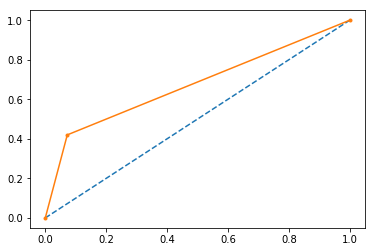

AUC: 0.674


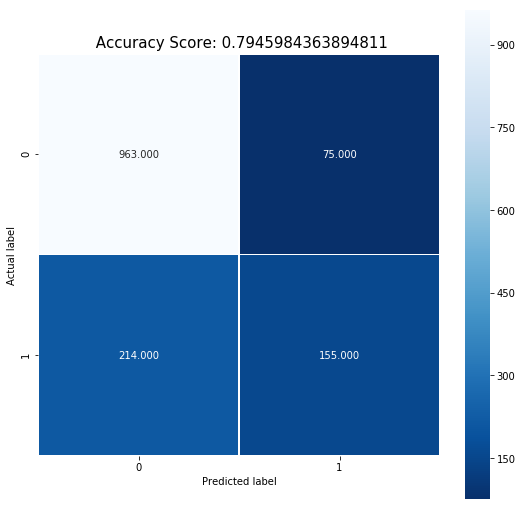

In [10]:
print ('\t\t-------------------SVM_WO_Feature_selection_(HO){After Tuning}----------------\n\n\n')
from sklearn.svm import SVC
SVM=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)


m=SVM.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
roc_plot(m,x_test,y_test,predictions)

		-------------------SVM_WO_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.641938787120264
 ROC_AUC FOR FOLD  2 is 0.6331209466378428
 ROC_AUC FOR FOLD  3 is 0.6290249175105246
 ROC_AUC FOR FOLD  4 is 0.6199633130207685
 ROC_AUC FOR FOLD  5 is 0.6221344774696347
 ROC_AUC FOR FOLD  6 is 0.5951996020395474
 ROC_AUC FOR FOLD  7 is 0.6420532272105459
 ROC_AUC FOR FOLD  8 is 0.6170200638394893
 ROC_AUC FOR FOLD  9 is 0.6369750860174936
 ROC_AUC FOR FOLD  10 is 0.6397536884221056


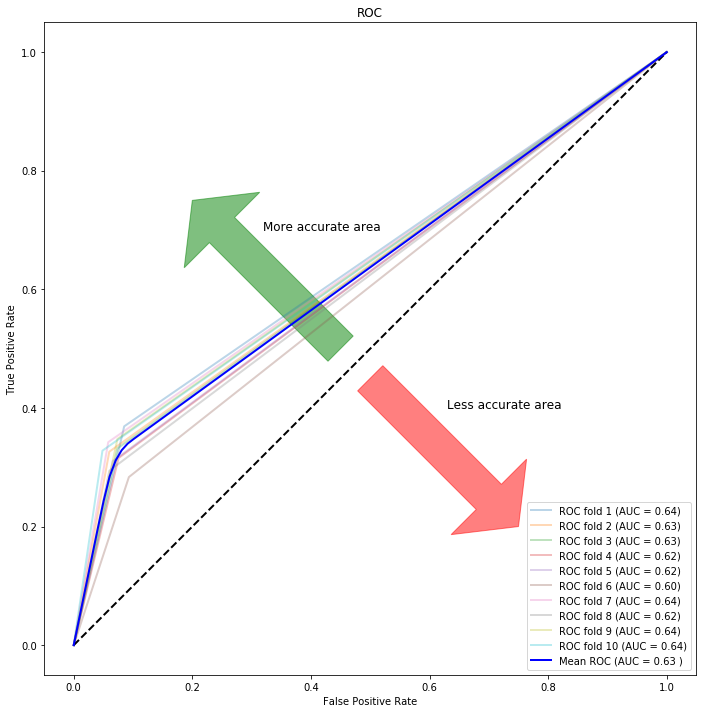

In [11]:
print ('\t\t-------------------SVM_WO_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pylab as plt
skf = StratifiedKFold(n_splits=10)
svm=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)
skf = StratifiedKFold(n_splits=10)

print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    svm_kf=svm.fit(X.iloc[train_index],Y[train_index])
    pred=svm_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_HO}--------------------
             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1038
          1       0.62      0.51      0.56       369

avg / total       0.78      0.79      0.78      1407

[[921 117]
 [182 187]]
tpr= [0.         0.50677507 1.        ]  and 1-fpr= [1.         0.88728324 0.        ]


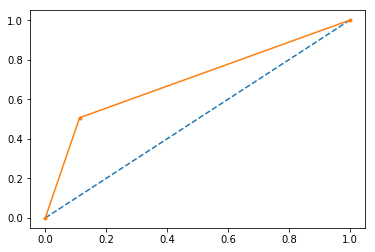

AUC: 0.697


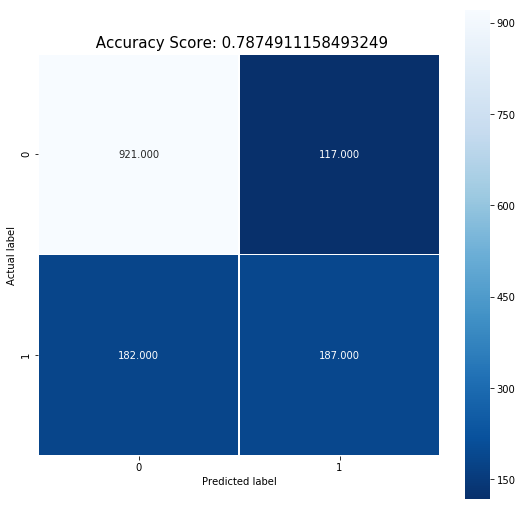

In [12]:
print("""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_HO}--------------------""")

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

clf_gini = DecisionTreeClassifier(max_depth = 5).fit(x_train, y_train)
predictions=clf_gini.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
roc_plot(clf_gini,x_test,y_test,predictions)

--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7427466150870405
 ROC_AUC FOR FOLD  2 is 0.7198202298327456
 ROC_AUC FOR FOLD  3 is 0.7129935146205484
 ROC_AUC FOR FOLD  4 is 0.7427973303486299
 ROC_AUC FOR FOLD  5 is 0.712686025784521
 ROC_AUC FOR FOLD  6 is 0.6968764249886
 ROC_AUC FOR FOLD  7 is 0.7311331509347926
 ROC_AUC FOR FOLD  8 is 0.7012187538863325
 ROC_AUC FOR FOLD  9 is 0.6946689881026407
 ROC_AUC FOR FOLD  10 is 0.7105838959739935


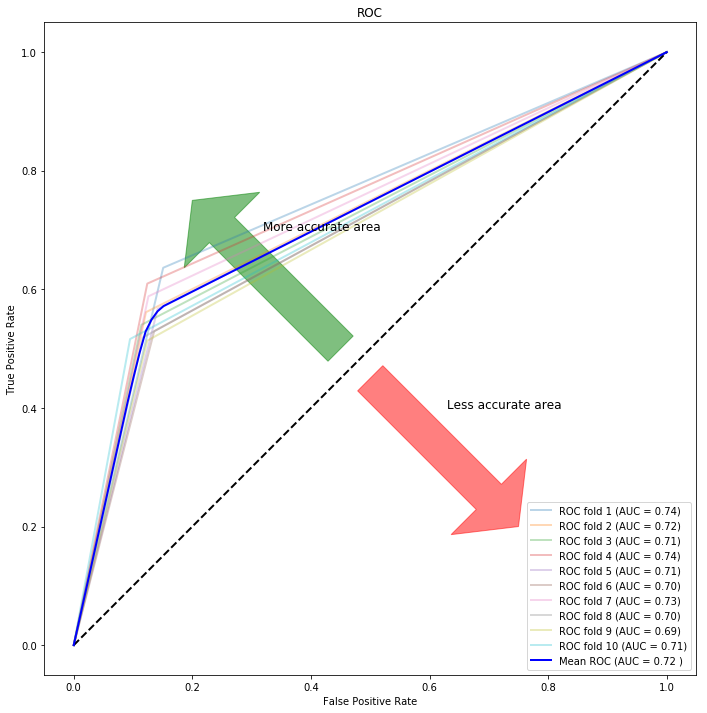

In [13]:
print("""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------""")
import matplotlib.patches as patches
import matplotlib.pylab as plt

clf_gini = DecisionTreeClassifier(max_depth = 5)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    clf_gini_kf=clf_gini.fit(X.iloc[train_index],Y[train_index])
    pred=clf_gini.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

--------------(MODELING PHASE)--{RandomForest_HO}--------------------
             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1038
          1       0.61      0.49      0.55       369

avg / total       0.77      0.79      0.78      1407

[[923 115]
 [187 182]]
tpr= [0.         0.49322493 1.        ]  and 1-fpr= [1.         0.88921002 0.        ]


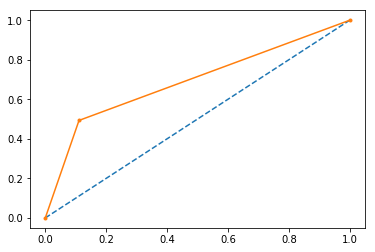

AUC: 0.691


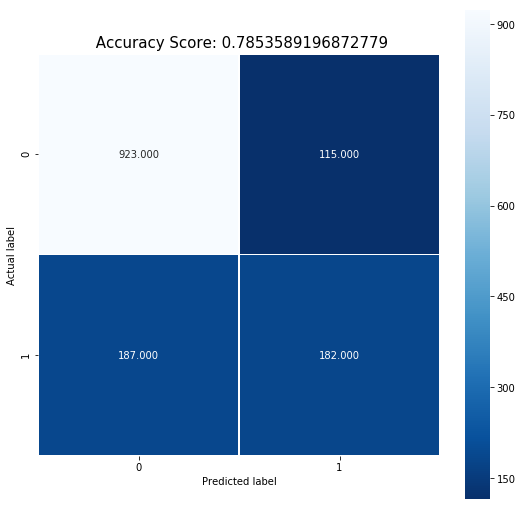

In [14]:
print("""--------------(MODELING PHASE)--{RandomForest_HO}--------------------""")
from sklearn.ensemble import RandomForestClassifier
Rf= RandomForestClassifier(n_estimators=75)
m=Rf.fit(x_train,y_train)
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
roc_plot(m,x_test,y_test,predictions)

<--------------------------------------K-fold RANDOM FOREST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7144157469564227
 ROC_AUC FOR FOLD  2 is 0.7194788940721355
 ROC_AUC FOR FOLD  3 is 0.6869382182273297
 ROC_AUC FOR FOLD  4 is 0.6963375202089294
 ROC_AUC FOR FOLD  5 is 0.6552615760892094
 ROC_AUC FOR FOLD  6 is 0.6543651287153339
 ROC_AUC FOR FOLD  7 is 0.7006798491066616
 ROC_AUC FOR FOLD  8 is 0.6849065207478342
 ROC_AUC FOR FOLD  9 is 0.6970370600671557
 ROC_AUC FOR FOLD  10 is 0.710052513128282


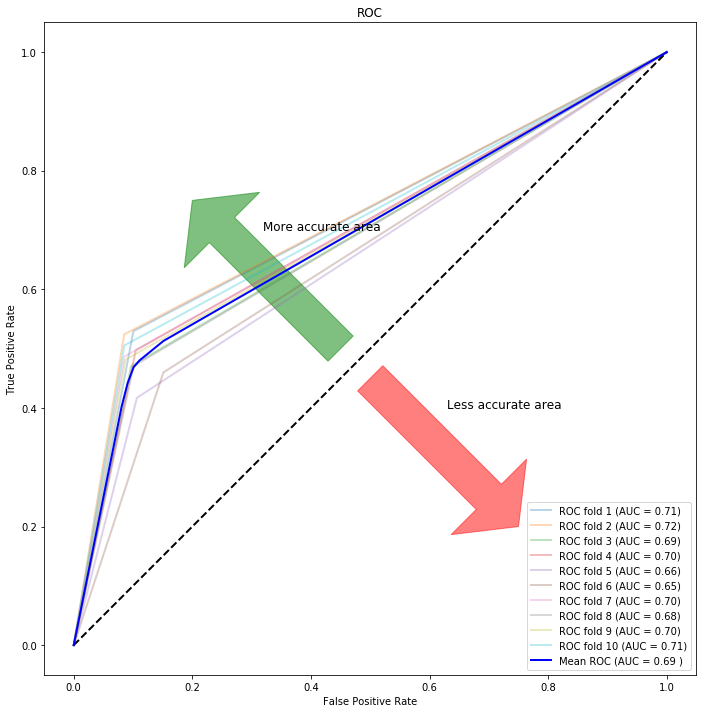

In [15]:
print("<--------------------------------------K-fold RANDOM FOREST------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=150)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=model.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------KNN_HO------------------------------------->
             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1038
          1       0.64      0.54      0.59       369

avg / total       0.79      0.80      0.79      1407

[[925 113]
 [169 200]]
tpr= [0.         0.54200542 1.        ]  and 1-fpr= [1.        0.8911368 0.       ]


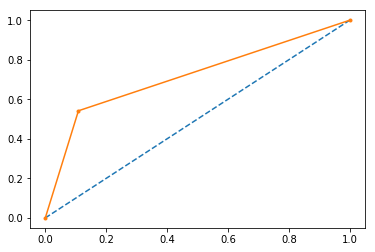

AUC: 0.717


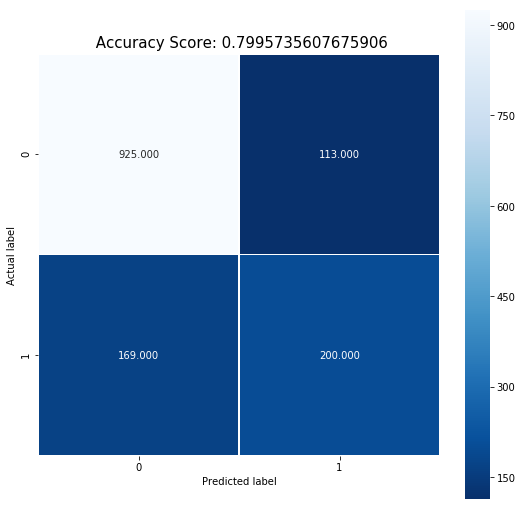

In [16]:
print("<--------------------------------------KNN_HO------------------------------------->")
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=100)
m=KN.fit(x_train,y_train) 
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
roc_plot(m,x_test,y_test,predictions)

<--------------------------------------KNN_KF------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.6289680282170895
 ROC_AUC FOR FOLD  2 is 0.6226533166458073
 ROC_AUC FOR FOLD  3 is 0.6241324382751166
 ROC_AUC FOR FOLD  4 is 0.6155847116859428
 ROC_AUC FOR FOLD  5 is 0.6226008373751192
 ROC_AUC FOR FOLD  6 is 0.6231034697176968
 ROC_AUC FOR FOLD  7 is 0.6475977283090826
 ROC_AUC FOR FOLD  8 is 0.6106672055714463
 ROC_AUC FOR FOLD  9 is 0.6286842432533267
 ROC_AUC FOR FOLD  10 is 0.6404101025256312


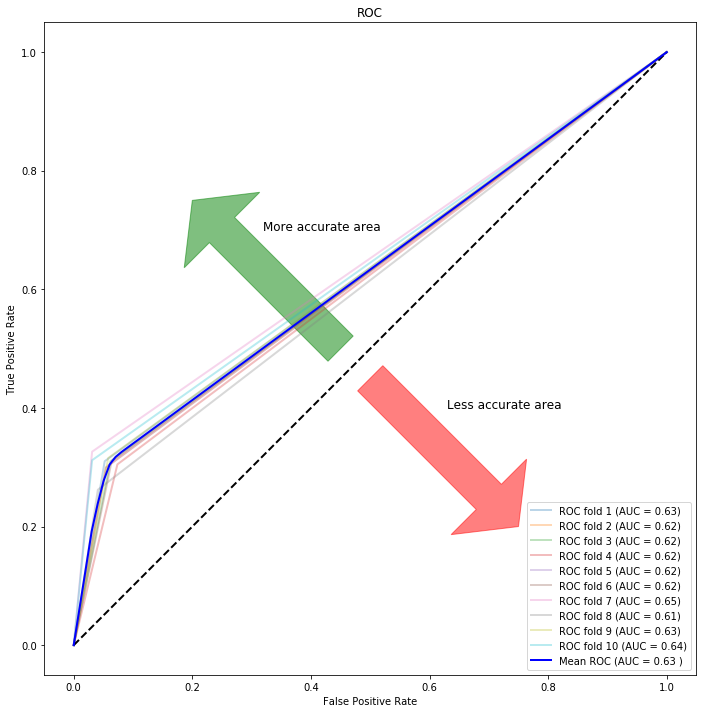

In [17]:
print("<--------------------------------------KNN_KF------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
KN=KNeighborsClassifier(n_neighbors=70)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=KN.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------XG-BOOST------------------------------------->
             precision    recall  f1-score   support

          0       0.84      0.91      0.88      1038
          1       0.68      0.53      0.59       369

avg / total       0.80      0.81      0.80      1407

[[946  92]
 [174 195]]
tpr= [0.         0.52845528 1.        ]  and 1-fpr= [1.         0.91136802 0.        ]


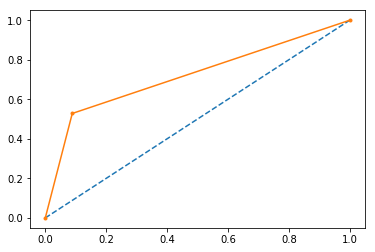

AUC: 0.720


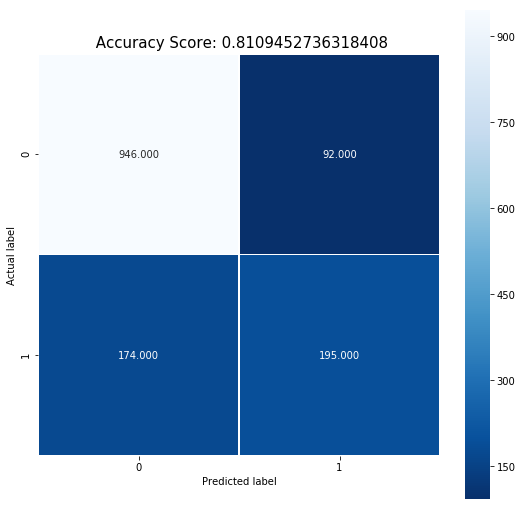

In [18]:
print("<--------------------------------------XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
m=clf.fit(x_train,y_train) 
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
roc_plot(m,x_test,y_test,predictions)

<--------------------------------------K-fold XG-BOOST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7288087381954717
 ROC_AUC FOR FOLD  2 is 0.7199908977130504
 ROC_AUC FOR FOLD  3 is 0.7066219137558312
 ROC_AUC FOR FOLD  4 is 0.7456680346557228
 ROC_AUC FOR FOLD  5 is 0.6968038801144136
 ROC_AUC FOR FOLD  6 is 0.7031567383824565
 ROC_AUC FOR FOLD  7 is 0.7471033868092691
 ROC_AUC FOR FOLD  8 is 0.7014156614019815
 ROC_AUC FOR FOLD  9 is 0.6909899266260415
 ROC_AUC FOR FOLD  10 is 0.7234933733433357


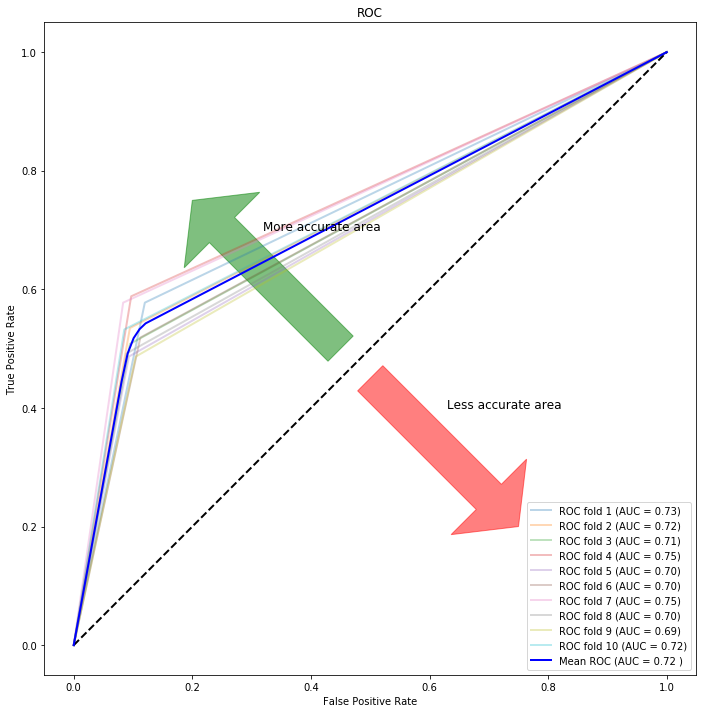

In [19]:
print("<--------------------------------------K-fold XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_kf, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_kf,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=clf.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [20]:
X.head(5)

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaperlessBilling_No,PaperlessBilling_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,StreamingMovies_No,...,Dependents_No,Dependents_Yes,Partner_No,Partner_Yes,SeniorCitizen_0,SeniorCitizen_1,gender_Female,gender_Male,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,1,0,0,1,...,1,0,0,1,1,0,1,0,29.85,29.85
1,0,0,0,1,1,0,0,1,0,1,...,1,0,1,0,1,0,0,1,56.95,1889.5
2,0,0,0,1,0,1,1,0,0,1,...,1,0,1,0,1,0,0,1,53.85,108.15
3,1,0,0,0,1,0,0,1,0,1,...,1,0,1,0,1,0,0,1,42.30,1840.75
4,0,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,70.70,151.65
